In [86]:
import pandas as pd
import numpy as np
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

!pip install linearmodels
from linearmodels.iv import IV2SLS
from collections import OrderedDict
from linearmodels.iv import compare
from linearmodels.iv.results import compare

# Q1

In [87]:
df = pd.read_csv("crime4.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 51 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   county    630 non-null    int64  
 1   year      630 non-null    int64  
 2   crmrte    630 non-null    float64
 3   prbarr    630 non-null    float64
 4   prbconv   630 non-null    float64
 5   prbpris   630 non-null    float64
 6   avgsen    630 non-null    float64
 7   polpc     630 non-null    float64
 8   density   630 non-null    float64
 9   taxpc     630 non-null    float64
 10  west      630 non-null    int64  
 11  central   630 non-null    int64  
 12  urban     630 non-null    int64  
 13  pctmin80  630 non-null    float64
 14  wcon      630 non-null    float64
 15  wtuc      630 non-null    float64
 16  wtrd      630 non-null    float64
 17  wfir      630 non-null    float64
 18  wser      630 non-null    float64
 19  wmfg      630 non-null    float64
 20  wfed      630 non-null    float6

In [88]:
# NO NAN 
df.isnull().sum()

county      0
year        0
crmrte      0
prbarr      0
prbconv     0
prbpris     0
avgsen      0
polpc       0
density     0
taxpc       0
west        0
central     0
urban       0
pctmin80    0
wcon        0
wtuc        0
wtrd        0
wfir        0
wser        0
wmfg        0
wfed        0
wsta        0
wloc        0
mix         0
pctymle     0
d82         0
d83         0
d84         0
d85         0
d86         0
d87         0
lcrmrte     0
lprbarr     0
lprbconv    0
lprbpris    0
lavgsen     0
lpolpc      0
ldensity    0
ltaxpc      0
lwcon       0
lwtuc       0
lwtrd       0
lwfir       0
lwser       0
lwmfg       0
lwfed       0
lwsta       0
lwloc       0
lmix        0
lpctymle    0
lpctmin     0
dtype: int64

In [89]:
df.describe()

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,...,lwtrd,lwfir,lwser,lwmfg,lwfed,lwsta,lwloc,lmix,lpctymle,lpctmin
count,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,...,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,100.60000,84.000000,0.031588,0.307368,0.688618,0.425518,8.954540,0.001917,1.386062,30.239194,...,5.232423,5.579433,5.364625,5.615181,5.988757,5.677787,5.540139,-2.234233,-2.443015,2.913361
std,58.03627,2.001589,0.018121,0.171205,1.690345,0.087245,2.658082,0.002735,1.439703,11.454695,...,0.214391,0.277204,0.360098,0.272747,0.158761,0.176131,0.159691,0.649565,0.196784,0.954615
min,1.00000,81.000000,0.001812,0.058824,0.068376,0.148936,4.220000,0.000458,0.197719,14.302560,...,2.825760,1.257233,0.611825,4.623305,5.542831,5.153407,5.097363,-6.008814,-2.778080,0.249708
25%,51.00000,82.000000,0.018352,0.217902,0.347692,0.374403,7.160000,0.001191,0.532944,23.425595,...,5.124259,5.462580,5.253943,5.455450,5.890330,5.553570,5.424002,-2.585961,-2.543456,2.303045
50%,103.00000,84.000000,0.028441,0.278240,0.474375,0.428571,8.495000,0.001451,0.952595,27.792330,...,5.222935,5.577550,5.377477,5.604311,6.001366,5.667706,5.533923,-2.281916,-2.486930,3.212684
75%,151.00000,86.000000,0.038406,0.352518,0.635597,0.483189,10.197500,0.001803,1.507818,33.271223,...,5.322137,5.711883,5.510016,5.768172,6.097062,5.803605,5.667369,-1.903749,-2.416943,3.643437
max,197.00000,87.000000,0.163835,2.750000,37.000000,0.678571,25.830000,0.035578,8.827652,119.761500,...,7.715457,6.233362,7.685734,6.472115,6.393507,6.306275,5.961237,1.386294,-1.293320,4.164309


In [90]:
#1.
df.shape
# There are 630 observations in the sumple  

(630, 51)

In [91]:
#2.
print("Panel Data years:\n",df.year.unique())
print()
print(df.groupby(by = 'year').count().county)

# The observation are between 1981-1987.
# There are 90 observations from each year.

Panel Data years:
 [81 82 83 84 85 86 87]

year
81    90
82    90
83    90
84    90
85    90
86    90
87    90
Name: county, dtype: int64


In [92]:
#3.
print("Number of counties:\n",df.county.nunique())

Number of counties:
 90


In [93]:
NumObs = df.shape[0]
NumCounty = df.county.nunique()

Rate = NumObs / NumCounty
Rate

# The rate between the number of observations and the number of counties is 7. 
# For every county we have 7 observations.
# The reason is that for every county we have a seperate observation for each year of the sample.

7.0

# Q2

In [94]:
#1.
grouped_df = df.groupby(by="year").mean() 
result = grouped_df[['polpc', 'crmrte']]
result

,polpc,crmrte
year,,
81,0.001722,0.032750
82,0.001697,0.032648
83,0.001873,0.030708
84,0.002162,0.029452
85,0.002230,0.029759
86,0.002025,0.032286
87,0.001708,0.033510


In [95]:
# Between the years 1981-1987 The number of police officers per capita has increased and then decreased.
# Between the years 1981-1987 The crime rate has decreased and then increased.

In [96]:
#2.
df81 = df.loc[df.year == 81]
df84 = df.loc[df.year == 84]
df87 = df.loc[df.year == 87]

Text(0.5, 1.0, '1981')

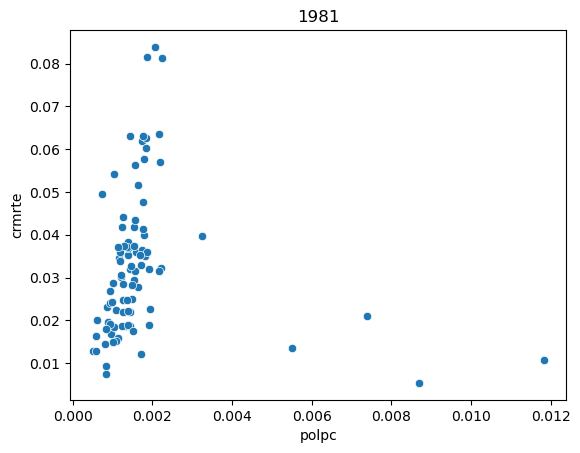

In [97]:
sns.scatterplot( x = df81.polpc, y = df81.crmrte)
plt.title("1981")

Text(0.5, 1.0, '1984')

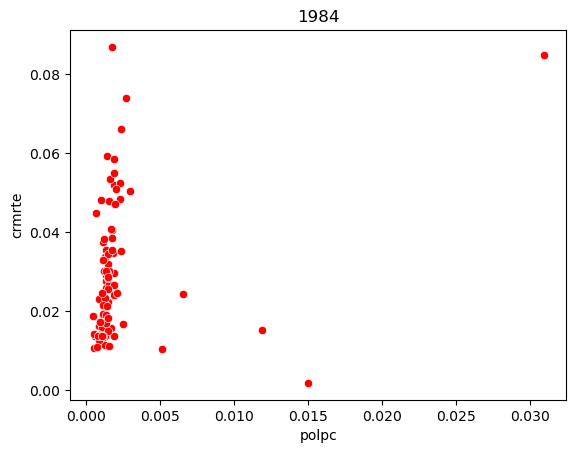

In [98]:
sns.scatterplot( x = df84.polpc, y = df84.crmrte, color = 'red')
plt.title("1984")

Text(0.5, 1.0, '1987')

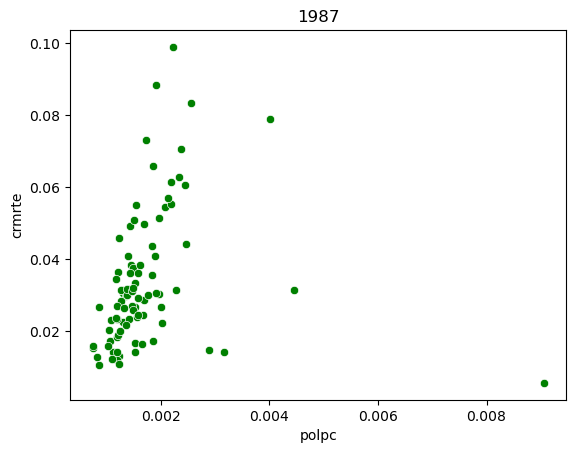

In [99]:
sns.scatterplot( x = df87.polpc, y = df87.crmrte, color = 'green')
plt.title("1987")

In [100]:
# According to the graphs from the years 81,84 and 87, there is unclear conclusion.
# The researcher claims that the number of policeman per capita affects negatively which is unclear 
# to see from the graphs. We can not assume a negative effect based on this data.
# Furthermore, without seeing what happened in each county we can't assume that each county has the same effect.

# Q3

In [101]:
df_west87 = df.loc[(df.year == 87) & (df.west == 1)]
df_west82 = df.loc[(df.year == 82) & (df.west == 1)]

In [102]:
describe_west87 = df_west87.loc[:,['polpc','crmrte']].describe()
describe_west87

,polpc,crmrte
count,21.000000,21.000000
mean,0.001965,0.020561
std,0.001719,0.009549
min,0.000860,0.005533
25%,0.001234,0.014193
50%,0.001516,0.017187
75%,0.001830,0.026984
max,0.009054,0.043735


In [103]:
describe_west82 = df_west82.loc[:,['polpc','crmrte']].describe()
describe_west82

,polpc,crmrte
count,21.000000,21.000000
mean,0.002042,0.020832
std,0.002658,0.008986
min,0.000739,0.003660
25%,0.001070,0.016447
50%,0.001368,0.019854
75%,0.001541,0.029021
max,0.012809,0.037154


In [104]:
descdiff_west = describe_west87 - describe_west82
descdiff_west

,polpc,crmrte
count,0.000000,0.000000
mean,-0.000077,-0.000271
std,-0.000939,0.000563
min,0.000121,0.001874
25%,0.000165,-0.002255
50%,0.000148,-0.002667
75%,0.000289,-0.002038
max,-0.003755,0.006581


In [105]:
# As we can see from descdiff_west dataframe, there is a decrease in the avarege value of policeman per capita
# from 1984 to 1987 and also decrease in the crime rate. 
# But, as we said before, without further investigation we can not support or deny the researcher claim
# From the reasons we mantioned above.

# Q4

In [106]:
west87_mean = describe_west87.loc['mean',:]
west82_mean = describe_west82.loc['mean',:]

In [107]:
df_central87 = df.loc[(df.year == 87) & (df.central == 1)]
df_central82 = df.loc[(df.year == 82) & (df.central == 1)]

In [108]:
describe_central87 = df_central87.loc[:,['polpc','crmrte']].describe()
describe_central87

,polpc,crmrte
count,34.000000,34.000000
mean,0.001650,0.037508
std,0.000477,0.019878
min,0.000746,0.010870
25%,0.001310,0.024485
50%,0.001569,0.031174
75%,0.002000,0.049610
max,0.002467,0.098966


In [109]:
describe_central82 = df_central82.loc[:,['polpc','crmrte']].describe()
describe_central82

,polpc,crmrte
count,34.000000,34.000000
mean,0.001829,0.037578
std,0.001981,0.019803
min,0.000659,0.012566
25%,0.001188,0.021299
50%,0.001524,0.031787
75%,0.001816,0.052799
max,0.012766,0.089035


In [110]:
descdiff_central = describe_central87 - describe_central82
descdiff_central

,polpc,crmrte
count,0.000000,0.000000
mean,-0.000179,-0.000070
std,-0.001504,0.000074
min,0.000087,-0.001695
25%,0.000122,0.003186
50%,0.000045,-0.000614
75%,0.000184,-0.003189
max,-0.010299,0.009931


In [111]:
central87_mean = describe_central87.loc['mean',:]
central82_mean = describe_central82.loc['mean',:]

In [112]:
print("Averages Diffrences West & Central (87-82):\n")
print("West 1987:\n",west87_mean,'\n')
print("West 1982:\n",west82_mean,'\n')
print("Central 1987:\n",central87_mean,'\n')
print("Central 1982:\n",central82_mean)

Averages Diffrences West & Central (87-82):

West 1987:
 polpc     0.001965
crmrte    0.020561
Name: mean, dtype: float64 

West 1982:
 polpc     0.002042
crmrte    0.020832
Name: mean, dtype: float64 

Central 1987:
 polpc     0.001650
crmrte    0.037508
Name: mean, dtype: float64 

Central 1982:
 polpc     0.001829
crmrte    0.037578
Name: mean, dtype: float64


In [113]:
# As we can see, in the Central zone, there is a similar results to the West zone.

# Q5

In [114]:
df_county25 = df.loc[df.county == 25]
df_county25_35 = df.loc[(df.county == 25) | (df.county == 35)]

Text(0.5, 1.0, 'County - 25')

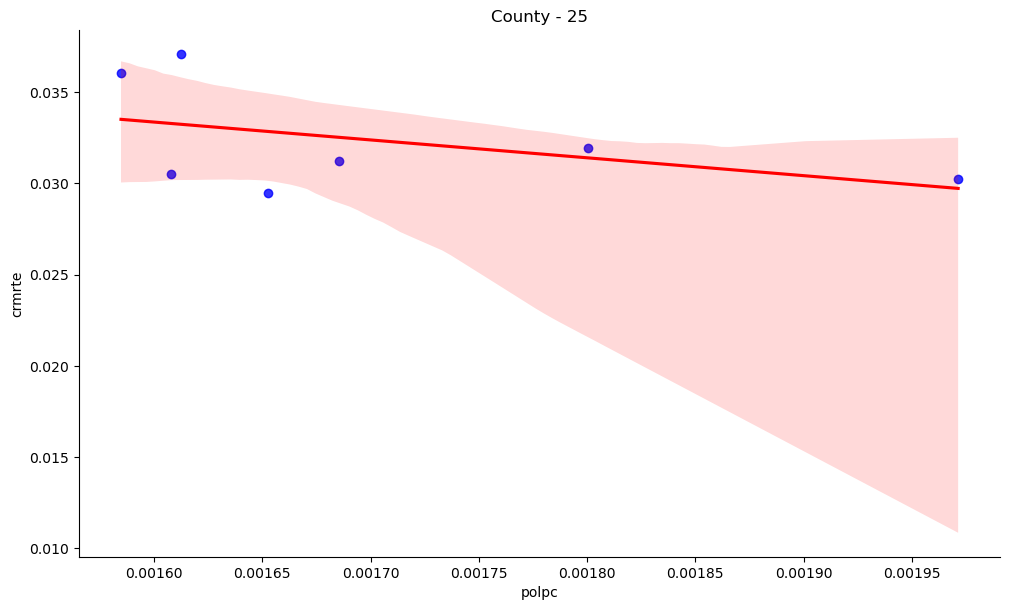

In [115]:
sns.lmplot( data = df_county25,
           x = 'polpc',
           y = 'crmrte',  
           line_kws={'color': 'red'}, scatter_kws={'color': 'blue'},height=6, aspect=1.7)
plt.title("County - 25")

Text(0.5, 1.0, 'County - 25 & 35')

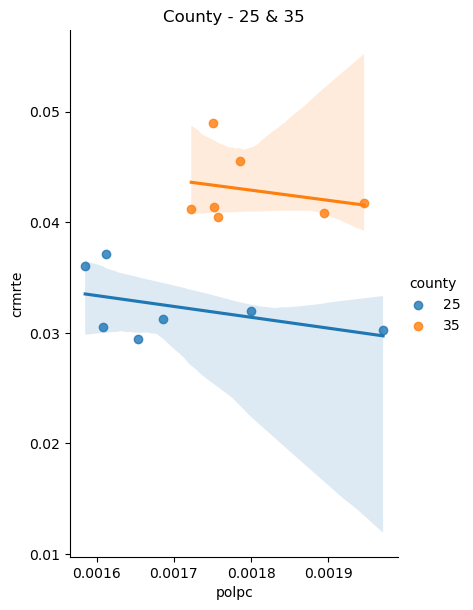

In [116]:
sns.lmplot( data = df_county25_35,
           x = 'polpc',
           y = 'crmrte',  
           hue = 'county',
           height = 6, aspect = 0.7)
plt.title("County - 25 & 35")

In [117]:
# BASED on the graphs, we can see a negative relationship between the number of policman per capita and 
# the crime rate.
# Yes, there is a diffrence. In questions 3, we see a positive relationship and now we see a negative relationship.

In [118]:
df_county35 = df.loc[df.county == 35]
df_county35.loc[:,['polpc','crmrte']].describe()

,polpc,crmrte
count,7.000000,7.000000
mean,0.001801,0.042880
std,0.000085,0.003169
min,0.001722,0.040471
25%,0.001751,0.041032
50%,0.001757,0.041414
75%,0.001840,0.043628
max,0.001947,0.048955


In [119]:
df_county25.loc[:,['polpc','crmrte']].describe()

,polpc,crmrte
count,7.000000,7.000000
mean,0.001702,0.032359
std,0.000139,0.003000
min,0.001585,0.029444
25%,0.001610,0.030381
50%,0.001653,0.031214
75%,0.001743,0.034001
max,0.001971,0.037092


In [120]:
# In terms of the regression lines, they are quite similar in their trend.
# There is little difference in the averages and the initial value of the regression line.
# As we mentioned earlier, as long as the regression takes into account the observations without reference to the years,
# it is not possible to obtain sufficiently reliable information.

# Q6

In [121]:
df82 = df.loc[df.year == 82]
df82.shape

(90, 51)

In [122]:
#1.
OLS_lev_lev = ols(formula='crmrte~polpc',data=df82).fit()
print(OLS_lev_lev.summary())

                            OLS Regression Results                            
Dep. Variable:                 crmrte   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                    0.6884
Date:                Thu, 27 Jun 2024   Prob (F-statistic):              0.409
Time:                        16:24:05   Log-Likelihood:                 239.16
No. Observations:                  90   AIC:                            -474.3
Df Residuals:                      88   BIC:                            -469.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0341      0.002     13.647      0.0

In [123]:
# Alpha1 means:
# When the number of police officers per capita increases by one unit, 
# the crime rate decreases by 0.84 percentage points.
# Alpha1 is NOT statistically significant. p>0.05
# The direction of the effect is indeed as the researcher expected.

In [124]:
# H0: a1 = 0
# H1: a1 !=0

(OLS_lev_lev.params.polpc - 0)/OLS_lev_lev.bse.polpc
# a1 is not statistically significant.

-0.8297013963834337

In [125]:
#2.
OLS_log_log = ols(formula='lcrmrte~lpolpc',data=df82).fit()
print(OLS_log_log.summary())

                            OLS Regression Results                            
Dep. Variable:                lcrmrte   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.1114
Date:                Thu, 27 Jun 2024   Prob (F-statistic):              0.739
Time:                        16:24:05   Log-Likelihood:                -72.465
No. Observations:                  90   AIC:                             148.9
Df Residuals:                      88   BIC:                             153.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3004      0.776     -4.255      0.0

In [126]:
# Meaning of beta1:
# A percentage increase in the number of police officers per capita will increase the crime rate by 0.0393 percent.
# In other words, beta1 measures the elasticity between the number of police officers per capita and the crime rate.
# Beta1 is NOT statistically significant. p>0.05.
# The direction of the effect is NOT as the researcher expected.

In [127]:
# H0: b1 = 0
# H1: b1 !=0

(OLS_log_log.params.lpolpc - 0)/OLS_log_log.bse.lpolpc
# b1 is not statistically significant.

0.3337137846891346

# Q7

In [128]:
OLS_LOG7 = ols(formula='lcrmrte~lpolpc+d82+d83+d84+d85+d86+d87',data=df).fit()
print(OLS_LOG7.summary())

                            OLS Regression Results                            
Dep. Variable:                lcrmrte   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     2.727
Date:                Thu, 27 Jun 2024   Prob (F-statistic):            0.00858
Time:                        16:24:05   Log-Likelihood:                -532.87
No. Observations:                 630   AIC:                             1082.
Df Residuals:                     622   BIC:                             1117.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.5275      0.288     -8.782      0.0

In [129]:
# Tau is the addition to the initial value in a certain year which is not 1981.
# Its effect changes the intercept in the regression.

In [130]:
b1 = OLS_log_log.params.lpolpc
m1 = OLS_LOG7.params.lpolpc
print("b1:",b1.round(4),'\n')
print("m1:",m1.round(4))

b1: 0.0393 

m1: 0.157


In [131]:
# We can see a big difference between the two.

# Q8

In [132]:
df.loc[df['year'] != 81, 'clcrmrte'] = df['lcrmrte'] - df['lcrmrte'].shift(1)

In [133]:
df.loc[df['year'] == 81, 'clcrmrte'] = np.nan

In [134]:
df.clcrmrte.head(20)

0          NaN
1    -0.039377
2    -0.235315
3     0.136179
4     0.051825
5    -0.051062
6     0.024198
7          NaN
8     0.151060
9    -0.229911
10   -0.103323
11   -0.126840
12    0.077025
13    0.159979
14         NaN
15    0.277457
16    0.038486
17    0.076888
18   -0.103083
19    0.132199
Name: clcrmrte, dtype: float64

# Q9

In [135]:
df.loc[df['year'] != 81, 'clpolpc'] = df['lpolpc'] - df['lpolpc'].shift(1)

In [136]:
df.loc[df['year'] == 81, 'clpolpc'] = np.nan

In [137]:
df.clpolpc.head(20)

0          NaN
1    -0.011364
2     0.038413
3     0.026930
4     0.020199
5    -0.015258
6    -0.036189
7          NaN
8     0.170985
9    -0.067522
10   -0.078554
11    0.051906
12    0.052944
13    0.098061
14         NaN
15    0.501592
16   -0.010292
17   -0.005351
18    0.105000
19   -0.266937
Name: clpolpc, dtype: float64

# Q10

In [138]:
OLS_LOG10 = ols(formula='clcrmrte~clpolpc',data=df).fit()
print(OLS_LOG10.summary())

                            OLS Regression Results                            
Dep. Variable:               clcrmrte   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     78.55
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           1.14e-17
Time:                        16:24:05   Log-Likelihood:                 132.31
No. Observations:                 540   AIC:                            -260.6
Df Residuals:                     538   BIC:                            -252.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0015      0.008     -0.179      0.8

In [139]:
# Delta0:
# Represents the estimated average change in clcrmrte when clpolpc is zero.
# it represents the expected change in the log crime rate at time t
# when there is no change in log police per capita (clpolpc=0).

# Delta1:
# Indicates the estimated effect of a one-unit change in clpolpc on clcrmrte.
# Specifically, it shows how much the log crime rate changes for a one-unit change in log police per capita.

# Q11

In [140]:
df_county_dum = pd.get_dummies(df, columns=['county'], drop_first=True)
df_county_dum.shape

(630, 141)

In [141]:
Dcounty = df_county_dum.iloc[:,52:]
Dcounty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 89 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   county_3    630 non-null    uint8
 1   county_5    630 non-null    uint8
 2   county_7    630 non-null    uint8
 3   county_9    630 non-null    uint8
 4   county_11   630 non-null    uint8
 5   county_13   630 non-null    uint8
 6   county_15   630 non-null    uint8
 7   county_17   630 non-null    uint8
 8   county_19   630 non-null    uint8
 9   county_21   630 non-null    uint8
 10  county_23   630 non-null    uint8
 11  county_25   630 non-null    uint8
 12  county_27   630 non-null    uint8
 13  county_33   630 non-null    uint8
 14  county_35   630 non-null    uint8
 15  county_37   630 non-null    uint8
 16  county_39   630 non-null    uint8
 17  county_41   630 non-null    uint8
 18  county_45   630 non-null    uint8
 19  county_47   630 non-null    uint8
 20  county_49   630 non-null    uint

In [142]:
OLS_11 = ols(formula='lcrmrte~lpolpc+d82+d83+d84+d85+d86+d87+Dcounty',data=df_county_dum).fit()
print(OLS_11.summary())

                            OLS Regression Results                            
Dep. Variable:                lcrmrte   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     76.58
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          1.22e-257
Time:                        16:24:05   Log-Likelihood:                 306.27
No. Observations:                 630   AIC:                            -418.5
Df Residuals:                     533   BIC:                             12.69
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.7641      0.178     -9.917      

In [143]:
# Gama0:
# Shows the initial crime rate in 1981 in county number 1.

# Gama1:
# Shows the elasticity between the number of police officers per capita in a certain year and 
# in a certain district and the crime rate.

# Dyear: 
# The addition to the intercept for a certain year.

# Dcounty: 
# The addition to the intercept for a certain county.

In [144]:
delta1 = OLS_LOG10.params.clpolpc
gama1 = OLS_11.params.lpolpc
print("delta1:",delta1.round(4))
print("gama1:",gama1.round(4))

delta1: 0.268
gama1: 0.239


In [145]:
# Both methods (FD & FE) are valuable tools in panel data analysis, 
# and the choice between them depends on the specific context and structure of our data.

# Q12

In [146]:
AVGs = df.groupby(by = "county")[['lcrmrte','lpolpc','central']].mean().reset_index()

In [147]:
df = df.merge(AVGs, on='county', how='left', suffixes=('', '_MeanC'))

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630 entries, 0 to 629
Data columns (total 56 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   county         630 non-null    int64  
 1   year           630 non-null    int64  
 2   crmrte         630 non-null    float64
 3   prbarr         630 non-null    float64
 4   prbconv        630 non-null    float64
 5   prbpris        630 non-null    float64
 6   avgsen         630 non-null    float64
 7   polpc          630 non-null    float64
 8   density        630 non-null    float64
 9   taxpc          630 non-null    float64
 10  west           630 non-null    int64  
 11  central        630 non-null    int64  
 12  urban          630 non-null    int64  
 13  pctmin80       630 non-null    float64
 14  wcon           630 non-null    float64
 15  wtuc           630 non-null    float64
 16  wtrd           630 non-null    float64
 17  wfir           630 non-null    float64
 18  wser      

In [149]:
df['Y'] = df.lcrmrte - df.lcrmrte_MeanC
df['X'] = df.lpolpc - df.lpolpc_MeanC
df['Z'] = df.central - df.central_MeanC

In [150]:
df.Z.unique()

array([0.])

In [151]:
# The values that the variable 'Z' receives are 0. This is because the 'central' variable is a dummy variable (0 or 1) and 
# therefore any difference from the average will be equal to 0.
# The mean of every county is equal to the value of each county (in each year).

Text(0.5, 1.0, 'County - 25')

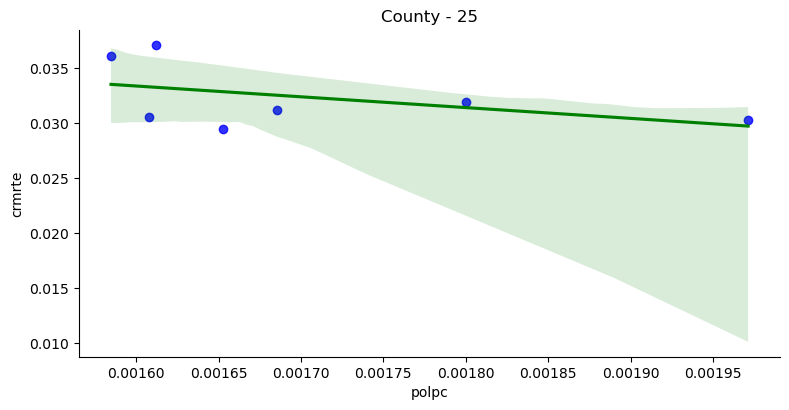

In [152]:
sns.lmplot( data = df_county25,
           x = 'polpc',
           y = 'crmrte',  
           line_kws={'color': 'green'}, scatter_kws={'color': 'blue'},height=4, aspect=2)
plt.title("County - 25")

In [153]:
df_county25 = df.loc[df.county == 25]

Text(0.5, 1.0, 'County - 25')

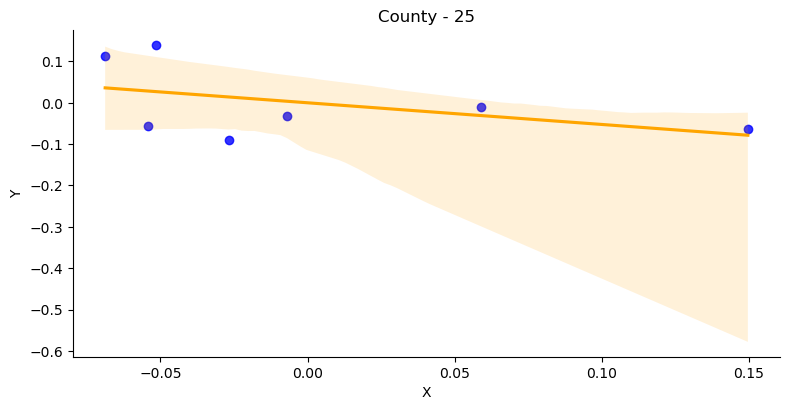

In [154]:
sns.lmplot( data = df_county25,
           x = 'X',
           y = 'Y',  
           line_kws={'color': 'orange'}, scatter_kws={'color': 'blue'},height=4, aspect=2)
plt.title("County - 25")

In [155]:
# The observations are placed in the same place but the values are different.
# This is because we subtracted from the original value the average value for each observation in each county. 
# Therefore, the relative position of the observations is the same and their value is different.

In [156]:
# In our opinion, it is not meaningful to test the regression on a single county, 
# but estimating the regression of variable y on x is a particular form of FE estimating because 
# the average value of each county contains values that are constant over time for 
# each county and by substructing the average value, we reduced the constant values over time.

In [157]:
OLS_12 = ols(formula='Y~X+d82+d83+d84+d85+d86+d87',data=df).fit()
print(OLS_12.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     25.73
Date:                Thu, 27 Jun 2024   Prob (F-statistic):           5.73e-31
Time:                        16:24:05   Log-Likelihood:                 306.27
No. Observations:                 630   AIC:                            -596.5
Df Residuals:                     622   BIC:                            -561.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0664      0.016      4.193      0.0

In [158]:
phi1 = OLS_12.params.X
print("phi1:",phi1.round(4))
print("gama1:",gama1.round(4))

phi1: 0.239
gama1: 0.239


In [159]:
# Both estimates are the same. A logical explanation for this is that the average of each county 
# is constant over the years in both x and y. This average contains constant characteristics of 
# that county over time and can therefore be used as a dummy variable for the county. Therefore, estimating 
# the direction and strength of the effect of the differences from the averages (when there is a dummy variable for the year) 
# is exactly like estimating the direction and strength of the effect of the model in question 11.

In [160]:
# The claim is correct from the reasons we mantioned above.

# Q13

In [161]:
OLS_13 = ols(formula=
"lcrmrte~lpolpc+d82+d83+d84+d85+d86+d87+lprbarr+lprbconv+lprbpris+lwfed+lwmfg+lwser+lwfir+lwtrd+lwtuc+lwcon+lwsta+lwloc+Dcounty"
             ,data=df_county_dum).fit()
print(OLS_13.summary()) 

                            OLS Regression Results                            
Dep. Variable:                lcrmrte   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     97.17
Date:                Thu, 27 Jun 2024   Prob (F-statistic):          2.11e-286
Time:                        16:24:06   Log-Likelihood:                 418.78
No. Observations:                 630   AIC:                            -619.6
Df Residuals:                     521   BIC:                            -135.0
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.1924      1.436      0.830      

In [162]:
# Phi0:
# Where all other variables are equal to zero, shows the log of initial crime rate in 1981 in county number 1.

# Phi1:
# Shows the elasticity between the number of police officers per capita in a certain year 
# in a certain county and the crime rate.

# D(year): 
# The addition to the intercept for a certain year.

# Phi2(lprbarr):
# Shows the elasticity between the probability of arrest in a certain year
# in a certain county and the crime rate.

# Phi3(lprbconv):
# Shows the elasticity between the probability of conviction in a certain year
# in a certain county and the crime rate.

# Phi4(lprbpris):
# Shows the elasticity between the probability of prison sentence in a certain year
# in a certain county and the crime rate.

# Phi5(lwfed):
# Shows the elasticity between the wage in federal government in a certain year
# in a certain county and the crime rate.

# Phi6(lwmfg):
# Shows the elasticity between the wage in manufacturing in a certain year
# in a certain county and the crime rate.

# Phi7(lwser):
# Shows the elasticity between the wage in services in a certain year
# in a certain county and the crime rate.

# Phi8(lwfir):
# Shows the elasticity between the wage in finance, insurance, and real estate in a certain year
# in a certain county and the crime rate.

# Phi9(lwtrd):
# Shows the elasticity between the wage in trade in a certain year
# in a certain county and the crime rate.

# Phi10(lwtuc):
# Shows the elasticity between the wage in transportation, utilities, and communications in a certain year
# in a certain county and the crime rate.

# Phi11(lwcon):
# Shows the elasticity between the wage in construction in a certain year
# in a certain county and the crime rate.

# Phil12(lwsta):
# Shows the elasticity between the pwage in state government in a certain year
# in a certain county and the crime rate.

# Phil13(lwloc):
# Shows the elasticity between the wage in local government in a certain year
# in a certain county and the crime rate.

# D(county): 
# The addition to the intercept for a certain county.

In [163]:
phi1New = OLS_13.params.lpolpc
print("phi1:",phi1.round(4))
print("phi1New:",phi1New.round(4))

phi1: 0.239
phi1New: 0.4231


In [164]:
# In both models the direction is positive. The new model shows stronger effect.

In [165]:
hypothesis1 = '(lwloc),(lwsta),(lwfed),(lwmfg),(lwser),(lwfir),(lwtrd),(lwtuc),(lwcon)=0'
f_test1 = OLS_13.f_test(hypothesis1)
print(f_test1)

<F test: F=2.4805299341452756, p=0.008860670540138366, df_denom=521, df_num=9>


In [166]:
# Critical Statistic F for 9 limitations and  N = 630 fro alpha=0.05 according to F table is: 1.88
# Therefore, the hypthesis that the variables above are not statistically significant is denied.

<Axes: >

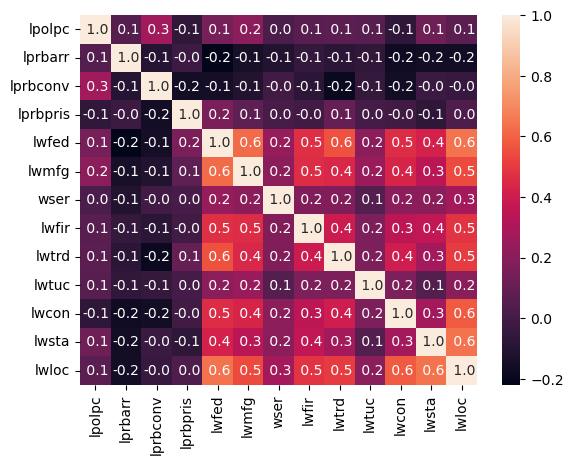

In [167]:
corr_matrix = df[['lpolpc','lprbarr','lprbconv','lprbpris',
                 'lwfed','lwmfg','wser','lwfir','lwtrd','lwtuc','lwcon','lwsta','lwloc']].corr().round(2)
sns.heatmap(corr_matrix, annot=True,fmt=' .1f', linewidths=0.001)

In [168]:
y,x = dmatrices('lcrmrte~lpolpc+d82+d83+d84+d85+d86+d87+lprbarr+lprbconv+lprbpris+lwfed+lwmfg+lwser+lwfir+lwtrd+lwtuc+lwcon+lwsta+lwloc+Dcounty',
                data=df,return_type='dataframe')

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['variable'] = x.columns
vif.head(50)           

,VIF,variable
0,69355.267195,Intercept
1,6.456394,lpolpc
2,2.447069,d82
3,4.389823,d83
4,6.802920,d84
5,12.789020,d85
6,18.895610,d86
7,26.209307,d87
8,5.994092,lprbarr
9,5.515282,lprbconv


In [169]:
# According to the last estimated model, it can be seen that increasing the number of police officers per capita actually increases the amount of crime per capita.
# We tested this model from several different directions:
# 1. We omitted irrelevant variables (they are not significant and do not contribute to the explanation).
# 2. Adding new explanatory variables that increase the explanatory power of the model.
# 3. Correlation, vif and multicollinearity test - full and partial.
# 4. Avoiding dummy variable trap.
# 5. Testing joint significance tests of several variables that are not significant separately.

In [170]:
# We would like to comment that although according to the model the obvious conclusion is that 
# increasing the number of police officers per capita increases the amount of crime per capita (a model with very significant explanatory power). 
# But, there are two problems that because of them we avoid unequivocal decisions:
# 1. Omission of relevant variables that may not be in the data file or not collected.
# 2. A problematic two-sided effect which means that placing a higher number of police officers will be in areas where crime has increased.
# Although this effect is reduced when additional explanatory variables are included. But not necessarily gone completely.
# It might be helpful to find an IV that solves this problem.